# Projeto florestas aleatórias

Dados disponíveis publicamente de [LendingClub.com](www.lendingclub.com). 
Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores). 
Tentar prever os investidores que tem uma alta probabilidade de pagar de volta.

Utilizando dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagou o empréstimo na íntegra. 
Baixar os dados de [aqui](https://www.lendingclub.com/info/download-data.action) 

**Descrição dos dados**
* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito da LendingClub.com e 0 caso contrário.
* purpose: O objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educacional", "grande compra", "small_business" e "all_other").
* int.rate: a taxa de juros do empréstimo (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados por LendingClub.com para serem mais arriscados recebem taxas de juros mais elevadas.
* installment: as parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: O log natural da renda anual auto-relatada do mutuário.
* dti: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* fico: a pontuação de crédito FICO do mutuário.
* days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito.
* revol.bal: Saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito).
* revol.util: taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* inq.last.6mths: número de consultas do mutuário por credores nos últimos 6 meses.
* delinq.2yrs: o número de vezes que o mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos).

# Importar bibliotecas


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obter dados


In [10]:
loans = pd.read_csv("loan_data.csv")

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Análise exploratória de dados 


Text(0.5, 0, 'Fico')

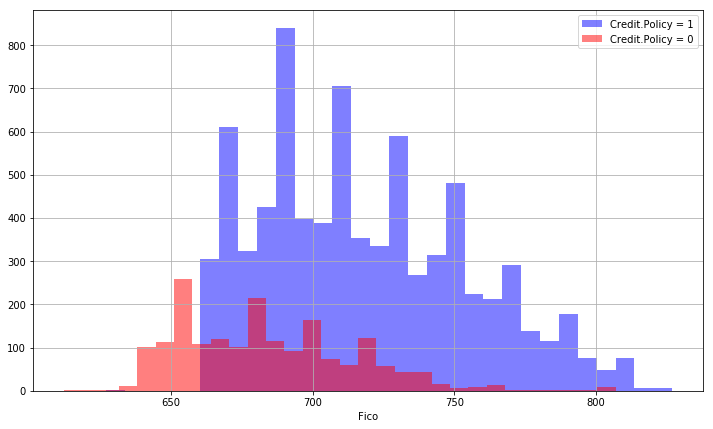

In [15]:
plt.figure(figsize=(12,7))

loans[loans['credit.policy']==1]['fico'].hist(alpha = 0.5, color= 'blue', bins = 30, label = 'Credit.Policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(alpha = 0.5, color= 'red', bins = 30, label = 'Credit.Policy = 0')

plt.legend()
plt.xlabel("Fico")


Text(0.5, 0, 'Fico')

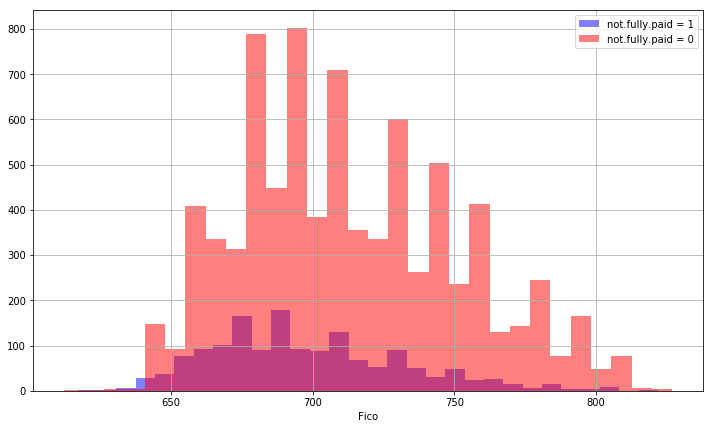

In [16]:
plt.figure(figsize=(12,7))

loans[loans['not.fully.paid']==1]['fico'].hist(alpha = 0.5, color= 'blue', bins = 30, label = 'not.fully.paid = 1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha = 0.5, color= 'red', bins = 30, label = 'not.fully.paid = 0')

plt.legend()
plt.xlabel("Fico")

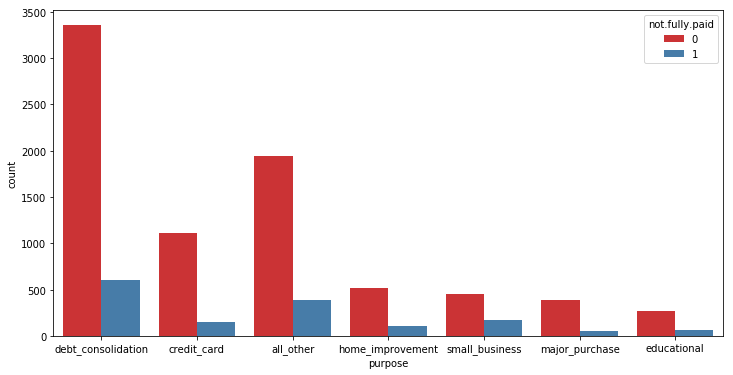

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', hue='not.fully.paid', data = loans, palette = 'Set1')

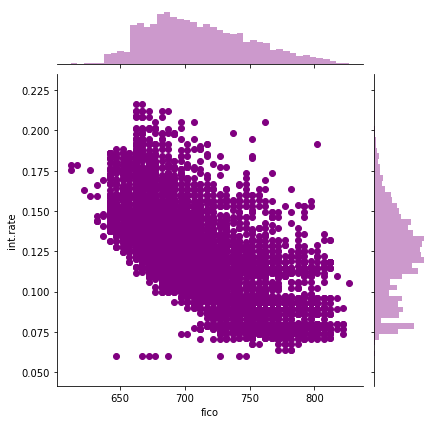

In [25]:
sns.jointplot(data = loans, x = 'fico', y = 'int.rate', color='purple') # tendencia entre FIC e taxa de juros

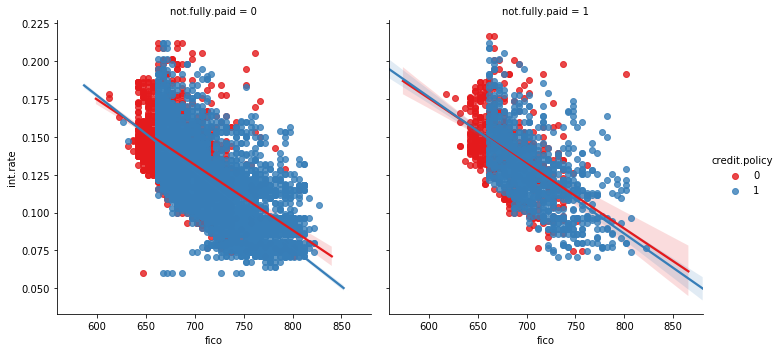

In [26]:
sns.lmplot(data = loans, x = 'fico', y = 'int.rate', hue='credit.policy', col='not.fully.paid', palette='Set1')

# Configurando os dados

Configurando dados para o modelo de classificação de florestas aleatórias!


In [27]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [30]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

## Recursos categóricos

Tratando a coluna ** purpose ** como categórica.

Transformar usando pd.get_dummies.


In [38]:
cat_feats = ['purpose']

usando "pd.get_dummies(loans, columns = cat_feats, drop_first = True)" para criar um DataFrame maior fixo que tenha novas colunas de recursos com variáveis dummy.

In [39]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [40]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Divisão Treino-Teste de dados

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Training a Decision Tree Model

Treinando uma única árvore de decisão primeiro!


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier()

In [45]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Previsões e avaliação da árvore de decisão

In [47]:
pred = dtree.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.22       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [52]:
print(confusion_matrix(y_test, pred))

[[1986  445]
 [ 336  107]]


## Treinando o modelo de florestas aleatórias

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=500)

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Previsões e Avaliação

Prevendo a classe de not.fully.paid para os dados X_test.

In [56]:
pred = rfc.predict(X_test)

Relatório de classificação dos resultados. 
Você recebe algo estranho ou algum tipo de aviso?

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.55      0.02      0.05       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [60]:
print(confusion_matrix(y_test, pred))

[[2422    9]
 [ 432   11]]


** O que performou melhor: a floresta aleatória ou a árvore de decisão? **

In [62]:
# observe o recall para cada classe para os modelos
# modelo da floresta performou muito mal sobre a ótica do recall em dados se a pessoa não pagou seus débitos

# e depende da métrica para a qual se está tentando otimizar.

# nenhum dos dois performou muito bem
# mas no geral, a floresta aleatória tende a ser superior em relação a árvore de decisão